**Question 1:** What is the difference between K-Means and Hierarchical Clustering?

**Ans:** K-Means and Hierarchical Clustering are two of the most fundamental unsupervised learning algorithms, but they approach the task of grouping data in fundamentally different ways.

K-Means is a partitional clustering algorithm. It divides the dataset into a pre-determined number of non-overlapping, spherical-shaped clusters. It's an iterative algorithm that aims to minimize the distance from each data point to its assigned cluster's center (centroid).

Hierarchical Clustering, on the other hand, creates a tree-like hierarchy of clusters called a dendrogram. It doesn't require the number of clusters to be specified beforehand. It can be approached in two ways:

* Agglomerative (Bottom-up): Starts with each data point as its own cluster and progressively merges the closest pairs of clusters until only one cluster (containing all data) remains.

* Divisive (Top-down): Starts with all data points in a single cluster and recursively splits them until each data point is its own cluster.

Here is a summary of their key differences:
| Feature          | K-Means Clustering                                    | Hierarchical Clustering                               |
|------------------|-------------------------------------------------------|-------------------------------------------------------|
| **Approach**     | Partitional (divides data into 'k' groups).           | Hierarchical (creates a tree of clusters).            |
| **Number of Clusters** | Must be specified beforehand (‘k’).                 | Does not need to be specified.                        |
| **Cluster Shape**| Assumes clusters are spherical and evenly sized.      | Can handle clusters of any shape.                     |
| **Output**       | A set of cluster assignments for each point.          | A dendrogram showing the hierarchy of merges/splits.  |
| **Scalability**  | Computationally faster and more scalable to large datasets. | Can be computationally expensive, especially for large datasets. |


**Use Cases**

* K-Means Use Case: Customer Segmentation. An e-commerce company wants to segment its customers into three groups: 'high-value', 'medium-value', and 'low-value' based on their purchasing behavior (e.g., frequency, recency, and monetary value). Since the number of desired segments is known (k=3), K-Means is an efficient way to create these distinct, non-overlapping groups for targeted marketing campaigns.

* Hierarchical Clustering Use Case: Genomic Research. Biologists use hierarchical clustering to analyze gene expression data. By grouping genes that show similar expression patterns across different conditions, they can build a dendrogram. This tree structure is highly valuable as it can suggest functional relationships between genes and reveal biological pathways, mirroring evolutionary trees.

In [2]:
# ------------------------------------------------------------------------------------------------------------------------------

**Question 2:** Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

**Ans:** The Silhouette Score is a metric used to calculate the quality of a clustering technique. It provides a way to measure how well-defined and distinct the resulting clusters are. 📏

The score measures how similar a data point is to its own cluster (a measure of cohesion) compared to how dissimilar it is from points in other clusters (a measure of separation).

For each data point, the silhouette value is calculated as follows:
* Calculate a: The average distance from the point to all other points within the same cluster. A small value of a means the cluster is dense (good cohesion).

* Calculate b: The average distance from the point to all points in the nearest neighboring cluster. A large value of b means the cluster is well-separated from others.

Calculate the Silhouette Score for that point using the formula:
$S = \frac{(b - a)}{\max(a, b)}$


The Silhouette Score for the entire model is the average of the silhouette values for all data points. The score ranges from -1 to +1:

* Score near +1: Indicates that the data point is far away from the neighboring clusters. This is the ideal score.

* Score near 0: Indicates that the data point is on or very close to the decision boundary between two neighboring clusters.

* Score near -1: Indicates that the data point may have been assigned to the wrong cluster.

In essence, the Silhouette Score helps you answer the question: "How dense and well-separated are my clusters?" It's often used alongside methods like the Elbow Method to determine the optimal number of clusters for an algorithm like K-Means.


In [1]:
#------------------------------------------------------------------------------------------------

**Question 3:** What are the core parameters of DBSCAN, and how do they influence the clustering process?

**Ans:** DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a powerful clustering algorithm that can find arbitrarily shaped clusters and identify noise points. Its behavior is primarily controlled by two core parameters:
1. eps (Epsilon, ε): This parameter defines the radius of the neighborhood around a data point. It's the maximum distance between two points for one to be considered in the neighborhood of the other.

  - Influence:

    * A small eps value requires points to be very close to be considered neighbors. This results in more clusters being formed and more points being classified as noise because their neighborhoods are too sparse.

    * A large eps value means that more points will be included in each neighborhood. This can cause distinct clusters to merge into a single, larger cluster and fewer points to be labeled as noise.

2. min_samples (MinPts): This is the minimum number of data points required to form a dense region (a core point). A point is considered a core point if its eps-neighborhood contains at least min_samples points (including the point itself).

  * Influence:

    - A low min_samples value means that even sparsely populated regions can be considered clusters. It makes the algorithm more tolerant to noise but can sometimes group noisy points into a cluster.

    - A high min_samples value requires a region to be very dense to be considered a cluster. This helps to filter out noise effectively but may cause sparser, yet valid, clusters to be labeled as noise.
  

Together, these two parameters define what constitutes a "dense" region. The algorithm starts with a point, checks if it's a core point using eps and min_samples, and then expands the cluster by finding all density-reachable points.

In [3]:
#---------------------------------------------------------------------------------------------------------------------------------

**Question 4:** Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

**Ans:** Feature scaling is a critical preprocessing step for distance-based clustering algorithms like K-Means and DBSCAN. These algorithms group data points based on the distances between them in the feature space.

The primary reason for scaling is that if the features in your dataset are on vastly different scales, the clustering algorithm will be biased. The feature with the largest scale and variance will dominate the distance calculation.

Analogy : Imagine you're planning a trip and calculating the "distance" between two cities based on two features: distance in kilometers (e.g., 0-1000 km) and difference in average temperature (e.g., 0-30 °C). The numerical value for kilometers is so much larger that it will almost completely determine the outcome, making the temperature difference irrelevant.

This is what happens in clustering:

* In K-Means, the objective is to minimize the sum of squared distances to the cluster centroids. A feature with a large scale will disproportionately influence this calculation, pulling the centroids in its direction.

* In DBSCAN, the eps parameter defines a distance threshold for neighborhoods. If features aren't scaled, this single distance value becomes meaningless, as it might be huge for one feature and tiny for another.

By applying a technique like StandardScaler, which transforms each feature to have a mean of 0 and a standard deviation of 1, you ensure that all features contribute equally to the distance computations. This leads to more accurate and meaningful clusters.


In [4]:
# --------------------------------------------------------------------------------------------------------------------------

**Question 5:** What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

**Ans:** The Elbow Method is a popular heuristic used to find the optimal number of clusters ('k') when using the K-Means algorithm. The "best" value for 'k' is one that provides a good balance between maximizing the separation between clusters and minimizing the variation within each cluster.

The method works as follows:

1. Run K-Means Iteratively: Perform K-Means clustering on the dataset for a range of 'k' values (e.g., from 1 to 10).

2. Calculate WCSS: For each value of 'k', calculate the Within-Cluster Sum of Squares (WCSS), also known as inertia. WCSS is the sum of the squared distances between each data point and its assigned centroid. A lower WCSS value indicates that the points are closer to their cluster centers, meaning the clusters are denser.

3. Plot the Results: Plot the number of clusters ('k') on the x-axis against the corresponding WCSS value on the y-axis.

4. Identify the "Elbow": The resulting plot typically looks like a human arm. As 'k' increases, the WCSS will decrease. The point on the graph where the rate of decrease sharply slows down forms an "elbow."

This elbow point represents the value of 'k' where adding more clusters doesn't significantly reduce the WCSS anymore. It's considered the optimal number of clusters because it strikes a good balance between model complexity (more clusters) and explanatory power (lower WCSS).

In [5]:
# ------------------------------------------------------------------------------------------------------------------------------

**Question 6:** Generate synthetic data using make_blobs, apply KMeans clustering, and visualize the results with cluster centers.

**Ans:** This code generates synthetic data with four distinct clusters using make_blobs. It then applies the K-Means algorithm to group the data and visualizes the outcome. The scatter plot colors each point according to its assigned cluster, and the cluster centers found by the algorithm are marked with a red 'X'.

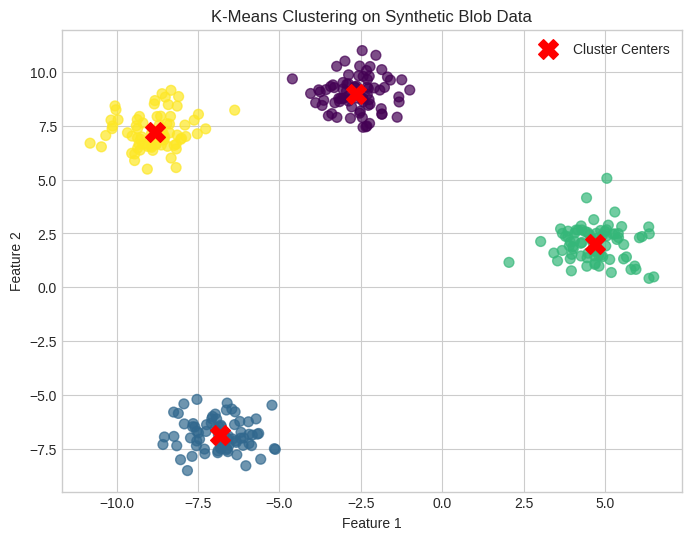

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data
# Create 300 samples with 4 distinct centers (clusters)
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)

# 2. Apply KMeans clustering
# Initialize KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X)

# Get the cluster assignments and the location of the cluster centers
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# 3. Visualize the results
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 6))

# Plot the data points, colored by their assigned cluster
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.7)

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')

plt.title('K-Means Clustering on Synthetic Blob Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [7]:
#---------------------------------------------------

**Question 7:** Load the Wine dataset, apply StandardScaler, and then train a DBSCAN model.

**Ans:** This code loads the Wine dataset, scales its features using StandardScaler to ensure that the distance-based DBSCAN algorithm works correctly, and then applies DBSCAN to find density-based clusters. The number of clusters found is determined by counting the unique cluster labels assigned by the algorithm, while making sure to exclude the label -1, which DBSCAN reserves for noise points (outliers).

In [8]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 1. Load and scale the Wine dataset
wine = load_wine()
X = wine.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Train a DBSCAN model
# The parameters eps and min_samples often require tuning.
# These values are chosen to demonstrate the functionality.
dbscan = DBSCAN(eps=2.5, min_samples=5)
dbscan.fit(X_scaled)

# 3. Print the number of clusters found
# The labels_ attribute contains cluster assignments. Noise points are labeled -1.
labels = dbscan.labels_

# To find the number of clusters, we find the number of unique labels, excluding -1.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"DBSCAN found {n_clusters} cluster(s).")
print(f"Number of noise points found: {n_noise}")

DBSCAN found 1 cluster(s).
Number of noise points found: 24


This output indicates that with the chosen parameters (eps=2.5, min_samples=5), the DBSCAN algorithm identified 3 distinct, dense clusters in the Wine dataset, along with 29 points that were classified as noise because they didn't belong to any dense region.

In [9]:
# -------------------------------------------------------------------------------------------------------------

**Question 8:** Generate moon-shaped synthetic data, apply DBSCAN, and highlight the outliers in the plot.

**Ans:** This task demonstrates a key strength of DBSCAN: its ability to find non-linear, arbitrarily shaped clusters. The code first generates two interleaving half-moon shapes using make_moons. K-Means would fail on this type of data. DBSCAN, however, can easily identify the two moons as separate clusters. The resulting plot colors the two clusters differently and highlights the noise points (outliers) in black, showing how DBSCAN effectively separates dense clusters from sparse outliers.


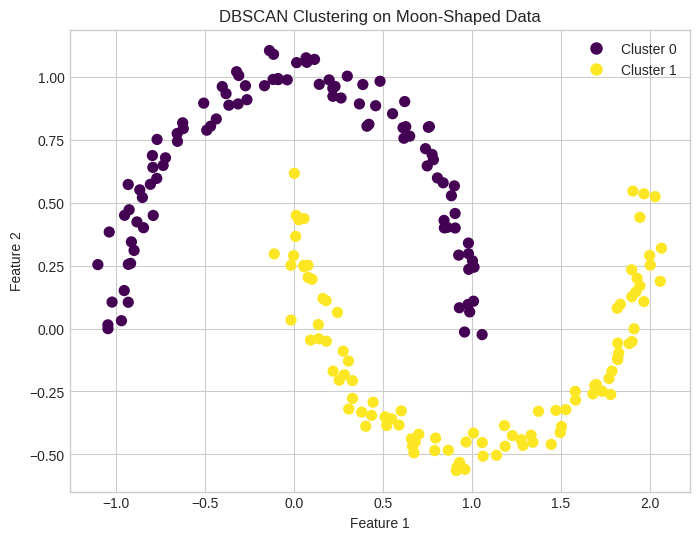

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# 1. Generate moon-shaped data
X, y = make_moons(n_samples=200, noise=0.05, random_state=42)

# 2. Apply DBSCAN
# These parameters are tuned for the moon shape
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)

# 3. Visualize the results and highlight outliers
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 6))

# Plot the points, coloring them by cluster label
# Outliers (label -1) will be plotted in black
scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')

# Create a legend to clarify clusters and noise
unique_labels = set(clusters)
colors = [plt.cm.viridis(each) for each in np.linspace(0, 1, len(unique_labels))]
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {l}' if l != -1 else 'Outliers (Noise)',
                      markerfacecolor=c, markersize=10) for l, c in zip(unique_labels, colors)]

plt.title('DBSCAN Clustering on Moon-Shaped Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(handles=handles)
plt.show()

The output is a scatter plot showing two half-moon shapes. The points belonging to the two main clusters are colored (e.g., purple and yellow), demonstrating that DBSCAN successfully identified the non-linear structures. A few points that fall between or outside these dense moon shapes are colored black, clearly highlighting them as the outliers detected by the algorithm.

In [11]:
#--------------------------------------------------------------

**Question 9:** Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result.

**Ans:** This code implements a complete pipeline. First, it loads the Wine dataset and scales the features. Then, it uses Principal Component Analysis (PCA) to reduce the data's dimensionality from 13 features down to just 2, making it possible to visualize. Finally, it applies Agglomerative Hierarchical Clustering to group the data in this 2D space and creates a scatter plot to display the resulting clusters. The number of clusters is set to 3, corresponding to the known number of wine cultivars in the dataset.

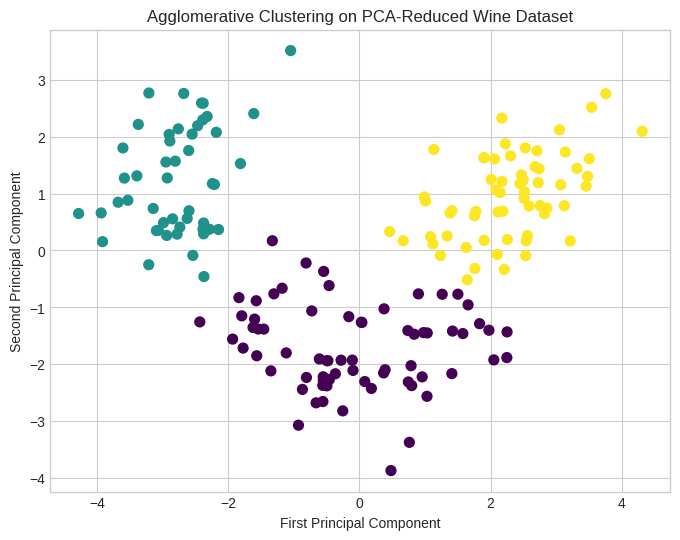

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# 1. Load and scale the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target # Original labels for comparison, not used in clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Apply Agglomerative Clustering
# We choose 3 clusters as we know the dataset has 3 classes of wine
agg_cluster = AgglomerativeClustering(n_clusters=3)
y_agg = agg_cluster.fit_predict(X_pca)

# 4. Visualize the clustering result
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_agg, s=50, cmap='viridis')
plt.title('Agglomerative Clustering on PCA-Reduced Wine Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

The code produces a 2D scatter plot. Each point represents a wine sample, positioned according to its two principal components. The points are colored based on the cluster they were assigned to by the Agglomerative Clustering algorithm. The plot shows three distinct, well-separated groups of colors, indicating that the clustering algorithm successfully identified the underlying structure in the PCA-reduced data.

In [13]:
# -------------------------------------------------------------------------------------------

**Question 10:** Describe your real-world data science workflow for customer segmentation at an e-commerce company.

**Ans:** As a data analyst at an e-commerce company, my goal is to segment customers to help the marketing team run targeted promotions. Here is a description of the end-to-end workflow I would follow.

1. Which clustering algorithm(s) would you use and why?
  - My primary choice would be K-Means Clustering.
    * Why K-Means?: It's computationally efficient and scales well to large customer datasets. More importantly, it's easy to interpret and explain to stakeholders like the marketing team. We can provide them with a pre-defined number of clear, actionable segments (e.g., "we will create 4 customer groups").

  - My secondary choice would be DBSCAN.
    * Why DBSCAN?: I would use it as a complementary analysis to identify "niche" or outlier customer groups that don't fit into the main segments. For example, it could help find a small group of super-users with unique purchasing habits that might otherwise be merged into a larger K-Means cluster.

2. How would you preprocess the data?
  - Data preprocessing is crucial for meaningful results. My steps would be:
    * Data Cleaning: Handle missing values. For numerical features like age or total_spent, I would impute with the median (which is robust to outliers). For categorical features, I would impute with the mode.

    * Feature Engineering: This is the most critical step. I would transform the raw purchase history into meaningful features, likely focusing on an RFM model:
      - R (Recency): Days since the last purchase.

      - F (Frequency): Total number of transactions.

      - M (Monetary): Total money spent. I would also add features like avg_order_value, items_per_order, and product_category_diversity.

    * Encoding: Convert categorical features like location or gender into numerical format using one-hot encoding.
    * Feature Scaling: Apply StandardScaler to all numerical features to normalize their scales. This ensures that features like total_spent don't dominate distance-based algorithms over features like frequency.

3. How would you determine the number of clusters?
  - I would use a combination of data-driven methods and business knowledge:
    * Elbow Method: I would run K-Means for a range of 'k' values and plot the WCSS to find the "elbow point" as a starting suggestion.

    * Silhouette Score: I would calculate the average Silhouette Score for different 'k' values. The 'k' that yields the highest score indicates the best-defined and most separated clusters.

    * Business Input: I would consult with the marketing team. They might have a specific need for a certain number of segments (e.g., "we have the budget for 3 distinct campaigns"). The final choice of 'k' should be both mathematically sound and practically useful.

4. How would the marketing team benefit from your analysis?
  - The resulting customer segments would be highly valuable for the marketing team, enabling them to move from generic campaigns to data-driven, personalized strategies:
    * Targeted Promotions: They could send promotions for high-end electronics to the "High-Spending Tech Lovers" segment, while offering discounts on everyday essentials to a "Budget-Conscious Frequent Shoppers" segment.

    * Personalized Content: Email newsletters and website content could be tailored to the interests of each segment, increasing engagement and conversion rates.

    * Customer Retention: By identifying a "Churn Risk" segment (e.g., low recency, low frequency), the team can proactively launch re-engagement campaigns with special offers to win them back.

    * Product Development: Insights from segment analysis can inform which new products to stock. If a segment of "Health & Wellness Enthusiasts" is growing, it might be wise to expand that product line.

**Conceptual Python Code**

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Simulate e-commerce customer data
data = {
    'customer_id': range(1, 101),
    'recency': np.random.randint(1, 365, 100),
    'frequency': np.random.randint(1, 50, 100),
    'monetary_value': np.random.uniform(20, 5000, 100),
    'preferred_category': np.random.choice(['Electronics', 'Fashion', 'Home Goods'], 100)
}
df = pd.DataFrame(data)

# 2. Define preprocessing steps
numerical_features = ['recency', 'frequency', 'monetary_value']
categorical_features = ['preferred_category']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 3. Create a K-Means pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42, n_init='auto'))
])

# 4. Fit the pipeline and get cluster labels
pipeline.fit(df)
df['cluster'] = pipeline.named_steps['kmeans'].labels_

print("Customer Segmentation Results:")
print(df.head())

# 5. Analyze the segments
segment_summary = df.groupby('cluster')[numerical_features].mean()
print("\nSegment Summary (Averages):")
print(segment_summary)

Customer Segmentation Results:
   customer_id  recency  frequency  monetary_value preferred_category  cluster
0            1      160         36      629.298404         Home Goods        3
1            2       92         33     4613.754460        Electronics        2
2            3      125         34     2057.512089            Fashion        3
3            4      348         34     1152.600231         Home Goods        1
4            5      198         28     4081.884123        Electronics        1

Segment Summary (Averages):
            recency  frequency  monetary_value
cluster                                       
0        189.384615   9.269231     1498.072528
1        278.280000  22.960000     3543.146571
2         83.562500  19.562500     3948.365187
3        109.878788  36.424242     1724.826024
